In [1]:
import numpy as np
import pandas as pd

In [2]:
def heat_capacity(energy, T):
    energy_mean = np.mean(energy)  # <E>
    energy_sq = energy**2 
    energy_sq_mean = np.mean(energy_sq)  # <E^2>
    k = 8.617e-5  # eV/K
    C = k * (energy_sq_mean - energy_mean**2) / (k * T)**2
    return C

In [3]:
# DeePMD
USELESS_LINE = 124
frames = 1000
energies_deepmd = []
with open('deepmd.lammps') as f:
    for i in range(USELESS_LINE):
        line = f.readline()
    for i in range(frames):
        line = f.readline()
        line_list = [float(num_str) for num_str in line.split()]
        energy = line_list[1]
        energies_deepmd.append(energy)
        line = f.readline()
energies_deepmd = np.array(energies_deepmd)

In [4]:
# SNAP 0.4A
energies_snap = pd.read_csv('torch_3_4A_20k_5_output.txt', delim_whitespace=True)['energy'].to_numpy()

In [5]:
energies_dft = np.load('Energy_all.npy') 

In [6]:
energies_dft

array([-25935.94893746, -25932.38431627, -25921.59943466, ...,
       -25920.8174845 , -25934.30837   , -25926.65821207])

In [7]:
# C_deepmd = heat_capacity(energies_deepmd) * 96492 # unit: ev/K
# C_snap = heat_capacity(energies_snap) * 96492
C_dft = heat_capacity(energies_dft, 600) * 96492
# print(f'C_deepmd = {C_deepmd:.4f} J/(mol*K)')
# print(f'C_snap = {C_snap:.4f} J/(mol*K)')
print(f'C_dft = {C_dft:.4f} J/(mol*K)')

C_dft = 250047.7923 J/(mol*K)


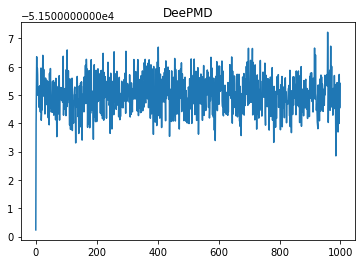

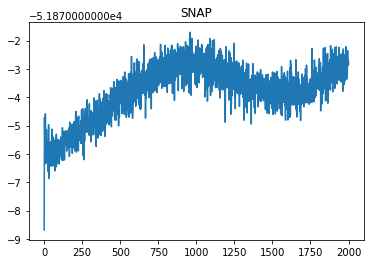

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('DeePMD')
plt.plot(energies_deepmd)
plt.show()
plt.figure()
plt.title('SNAP')
plt.plot(energies_snap)
plt.show()